# Interest Rate Impact on Stock Market


##### Motivation: Evaluate the relationship between interest rates and the stock market.



[Yahoo Data](https://finance.yahoo.com/quote/%5EGSPC/history?period1=-1325635200&period2=1603929600&interval=1mo&filter=history&frequency=1mo&includeAdjustedClose=true)

In [1]:
#Scrape S&P Data From Yahoo Website
%run yahooSP.py

Compete!!

Rows Scraped:
Date           1116
Open           1115
High           1115
Low            1115
Close*         1115
Adj Close**    1115
Volume         1115
dtype: int64

Time Elapsed
--- 59.84 seconds ---


In [2]:
#Common Imports 
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot
from plotly.subplots import make_subplots
from pandas_profiling import ProfileReport
import helperfunctions

In [3]:
#CommonFiles
spDataFile="data/SPHistory.csv"
dgs10DataFile="data/DGS10.csv"


In [4]:
#Perform Data Cleansing on S&P Data and Create Data Frame
    #Add 1 day to the Date to conform to Treasury Data
    #Limit Date range to match treasury
    #Convert AdjClose to an integer
    #Convert Date to DateTime
    #Calulcate Additional Columns that were used in other analysis
spData=helperfunctions.spDataCleansing(spDataFile)
spData.tail(3)

,Date,Open,High,Low,Close,AdjClose,Volume,AdjCloseInt,Rate,RateNeg,RRChange,AdjCloselog
3,2020-08-01,"3,288.26","3,514.77","3,284.53","3,500.31","3,500.31","84,402,300,000",3500.31,7.0,-7.0,27.3,8.160607
2,2020-09-01,"3,507.44","3,588.11","3,209.45","3,363.00","3,363.00","92,084,120,000",3363.00,-3.9,3.9,-155.7,8.120589
1,2020-10-01,"3,385.87","3,549.85","3,233.94","3,269.96","3,269.96","89,737,600,000",3269.96,-2.8,2.8,-28.2,8.092533


In [5]:
#Perform Data Cleansing on DGS10 (10 year Treasuries) Data and Create Data Frame
    #Limit Date range to match S&P
    #Convert Rate to an integer
    #Convert Date to DateTime
    #Calulcate Additional Columns that were used in other analysis
dgs10Data=helperfunctions.dgs10DataCleansing(dgs10DataFile)
dgs10Data.tail(3)

,Date,Rate,ChangeRate,quarter,year,yearmo,RateLog,Date_2,Date_3
703,2020-08-01,0.6,0.0,3,2020,2020-3,-0.510826,2020-08-01,2020-07-01
704,2020-09-01,0.7,16.7,3,2020,2020-3,-0.356675,2020-09-01,2020-08-01
705,2020-10-01,0.8,14.3,4,2020,2020-4,-0.223144,2020-10-01,2020-09-01


In [7]:
trace1 = go.Scatter(
                    x = spData.Date,
                    y = spData.RateNeg,
                    mode = "lines",
                    name = "S&P Rate of Return",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    )
# Creating trace2
trace2 = go.Scatter(
                    x = dgs10Data.Date,
                    y = dgs10Data.ChangeRate,
                    mode = "lines+markers",
                    name = "Change in Interest Rate",
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'),
                    )
data = [trace1, trace2]
layout = dict(title = 'Interest Rate Impact on S&P',
              xaxis= dict(title= 'Year',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Rate',ticklen= 5,zeroline= False),
              legend=dict(
                            yanchor="top",
                            y=0.99,
                            xanchor="left",
                            x=0.01
                        ),
            margin=dict(l=30, r=30, t=30, b=20),
            width = 5000,
            height = 500
             )
fig = dict(data = data, layout = layout)
iplot(fig)

In [23]:
#Consolidate Data
consolidatedData=helperfunctions.consolidateDataSet(spData,dgs10Data)
consolidatedData.tail(3)

,SPClose,InterestRate
Date,,
2020-08-01,3500.31,0.6
2020-09-01,3363.00,0.7
2020-10-01,3269.96,0.8


In [10]:
fig = make_subplots(
    rows=2, cols=1,
    subplot_titles=("S&P Price", "Interest Rate"))

fig.add_trace(go.Scatter(x=consolidatedData.index, y=consolidatedData.SPClose),
              row=1, col=1)

fig.add_trace(go.Scatter(x=consolidatedData.index, y=consolidatedData.InterestRate),
              row=2, col=1)

fig.update_layout(height=500, width=700, showlegend=False, margin=dict(l=20, r=20, t=20, b=20),
)

fig.show()

In [33]:
consolidatedData.corr()
#Negative Correlation between Interest Rate and Close Price which makes some intuitive sense as they typically move in opposite directions

,SPClose,InterestRate
SPClose,1.000000,-0.706804
InterestRate,-0.706804,1.000000


In [37]:
consolidatedData.cov()#Negative Covariance between Interest Rate and Close Price which makes some intuitive sense as they typically move in opposite directions

,SPClose,InterestRate
SPClose,726737.734229,-1815.069562
InterestRate,-1815.069562,9.074263


In [44]:
stat,p = stats.normaltest(consolidatedData.SPClose)
print("Chi Squared = %.3f, p=%.3f" % (stat,p))
alpha = 0.05
if p> alpha:
    print('Data is Gaussian')
else:
    print('Data is non-Gaussian')

Chi Squared = 57.324, p=0.000
Data is non-Gaussian


In [45]:
stat,p = stats.normaltest(consolidatedData.InterestRate)
print("Chi Squared = %.3f, p=%.3f" % (stat,p))
alpha = 0.05
if p> alpha:
    print('Data is Gaussian')
else:
    print('Data is non-Gaussian')

Chi Squared = 27.827, p=0.000
Data is non-Gaussian


In [13]:
#If the skewness is between -0.5 and 0.5, the data are fairly symmetrical.
#If the skewness is between -1 and -0.5(negatively skewed) or between 0.5 and 1(positively skewed), the data are moderately skewed.
#If the skewness is less than -1(negatively skewed) or greater than 1(positively skewed), the data are highly skewed.

#Mesokurtic: This distribution has kurtosis statistic similar to that of the normal distribution. It means that the extreme values of the distribution are similar to that of a normal distribution characteristic. This definition is used so that the standard normal distribution has a kurtosis of three.
#Leptokurtic (Kurtosis > 3): Distribution is longer, tails are fatter. Peak is higher and sharper than Mesokurtic, which means that data are heavy-tailed or profusion of outliers. Outliers stretch the horizontal axis of the histogram graph, which makes the bulk of the data appear in a narrow (“skinny”) vertical range, thereby giving the “skinniness” of a leptokurtic distribution.
#Platykurtic: (Kurtosis < 3): Distribution is shorter, tails are thinner than the normal distribution. The peak is lower and broader than Mesokurtic, which means that data are light-tailed or lack of outliers.The reason for this is because the extreme values are less than that of the normal distribution.

#https://codeburst.io/2-important-statistics-terms-you-need-to-know-in-data-science-skewness-and-kurtosis-388fef94eeaa

print('Kurtosis SP: {}'.format(stats.kurtosis(consolidatedData.SPClose))) #Mesokurtic
print('Skewness SP: {}'.format(stats.skew(consolidatedData.SPClose))) #Skewed
print('Kurtosis Interest Rate: {}'.format(stats.kurtosis(consolidatedData.InterestRate))) #Mesokurtic
print('Skewness Interest Rate: {}'.format(stats.skew(consolidatedData.InterestRate)))#Moderately Skewed



Kurtosis SP: 0.3602819040802028
Skewness SP: 1.0979875955414482
Kurtosis Interest Rate: 0.3078679049008044
Skewness Interest Rate: 0.6857667572233825


count     386.000000
mean      833.321606
std       852.489140
min        54.750000
25%       103.920000
50%       449.160000
75%      1303.325000
max      3500.310000
Name: SPClose, dtype: float64

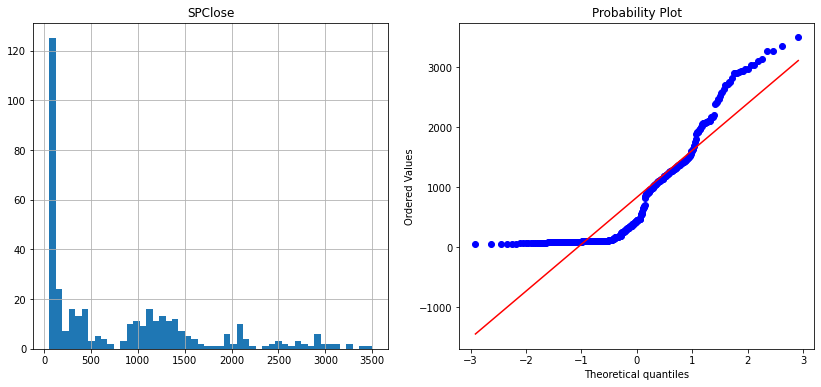

In [43]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
consolidatedData['SPClose'].hist(bins=50)
plt.title('SPClose')
plt.subplot(1,2,2)
stats.probplot(consolidatedData['SPClose'], plot=plt);
consolidatedData.SPClose.describe().T

##Non-Linear

count     386.000000
mean      833.321606
std       852.489140
min        54.750000
25%       103.920000
50%       449.160000
75%      1303.325000
max      3500.310000
Name: SPClose, dtype: float64

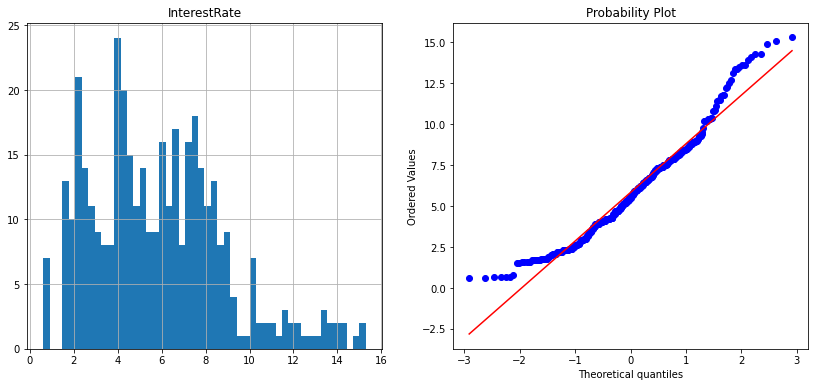

In [14]:

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
consolidatedData['InterestRate'].hist(bins=50)
plt.title('InterestRate')
plt.subplot(1,2,2)
stats.probplot(consolidatedData['InterestRate'], plot=plt);
consolidatedData.SPClose.describe().T

##Non-Linear but closer

In [15]:
prof = ProfileReport(consolidatedData)
prof.to_file(output_file='output.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 203.87it/s]


In [17]:
print('Augmented Dickey-Fuller Test: Interest_rate Time Series')
helperfunctions.augmented_dickey_fuller_statistics(consolidatedData['InterestRate'])
print('Augmented Dickey-Fuller Test: Stock_Index Time Series')
helperfunctions.augmented_dickey_fuller_statistics(consolidatedData['SPClose'])

Augmented Dickey-Fuller Test: Interest_rate Time Series
ADF Statistic: -1.050035
p-value: 0.734581
Critical Values:
	1%: -3.448
	5%: -2.869
	10%: -2.571
Augmented Dickey-Fuller Test: Stock_Index Time Series
ADF Statistic: 2.618331
p-value: 0.999078
Critical Values:
	1%: -3.448
	5%: -2.869
	10%: -2.571


In [24]:
helperfunctions.grangers_causality_matrix(consolidatedData, variables = consolidatedData.columns)  

#If we take the value .27 in (row 1, column 12, it refers to the p-value of the Granger’s Causality test for InterestRate_x causing SPClose_y. 

,SPClose_x,InterestRate_x
SPClose_y,1.0000,0.3873
InterestRate_y,0.0171,1.0000


In [ ]:
#References https://towardsdatascience.com/granger-causality-and-vector-auto-regressive-model-for-time-series-forecasting-3226a64889a6